## Importing Libraries and Dataframe

In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy

In [14]:
path = r'C:\Users\BaratSakhizada\Desktop\Achievement 4\02 Data\Prepared Data'

In [16]:
path1 = r'C:\Users\BaratSakhizada\Desktop\Achievement 4\Visualizatoins\Visualizations_final achievement'

In [18]:
df_merged_all = pd.read_pickle(os.path.join(path, 'Ex 4.9 - cust_ords_prods_all_merged_clean.pickle'))

In [19]:
df_dep = pd.read_csv(os.path.join(path, 'departments_wrangled_final.csv'), index_col=False)

In [42]:
df_merged_all.shape

(32408279, 36)

## Addressing any PII Data 

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [8]:
# checking the column's names
df_merged_all.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'no_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'merge_indicator', 'merge1_indicator',
       'product_name', 'aisle_id', 'department_id', 'prices', 'merge2',
       'busiest_day', 'busiest_days', 'busiest_hours', 'max_order',
       'loyalty_flag', 'average_price', 'loyalty_flag2', 'median_prior_order',
       'loyalty_flag3', 'merge_cust'],
      dtype='object')

First_name and last_name are considered as PII. There are two solutions to this. First we inform senior colleauges about the issue and ask them for theri guidance. Secondly, if we are confident, we can delete the PII data by ourselves. As part of this exercise, we decide to delete them. 
User_id, gender, state, age, date_joined could be potential PII if they are used together with PII data for identifying and locating people. Since the objective of the project is not as such, so we can categorize them as non-PII data. 
Rest of the data are all non-PII. 

In [44]:
df_merged_all.head()

,user_id,first_name,last_name,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,merge_indicator,merge1_indicator,product_name,aisle_id,department_id,prices,merge2,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,loyalty_flag2,median_prior_order,loyalty_flag3,merge_cust
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,2,9,NaN,6184,1,0,both,both,both,Clementines,32,4,4.3,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,6184,2,1,both,both,both,Clementines,32,4,4.3,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,47402,3,0,both,both,both,Fuji Apples,24,4,7.1,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both


In [10]:
# removing first_name and last_name columns 
df_merged_all = df_merged_all.drop(columns = ['first_name', 'last_name'])

In [14]:
df_merged_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'merge_indicator',
       'merge1_indicator', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge2', 'busiest_day', 'busiest_days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'average_price', 'loyalty_flag2',
       'median_prior_order', 'loyalty_flag3', 'merge_cust'],
      dtype='object')

## Regional Segmentation of Customers

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [31]:
# first we check count of states in the state column
df_merged_all['state'].value_counts(dropna = False)

state
Pennsylvania            667142
California              659837
Rhode Island            656979
Georgia                 656437
New Mexico              654542
Arizona                 654066
North Carolina          651942
Oklahoma                651853
Alaska                  648519
Minnesota               647927
Massachusetts           646376
Wyoming                 644291
Virginia                641457
Missouri                640810
Texas                   640478
Colorado                639340
Maine                   638655
North Dakota            638545
Alabama                 638099
Kansas                  637604
Louisiana               637530
Delaware                637096
South Carolina          636892
Oregon                  636491
Nevada                  636205
Arkansas                636168
New York                636037
Montana                 635337
South Dakota            633826
Illinois                633102
Hawaii                  632943
Washington              632930
Mi

In [33]:
# after checking count of states, we create a new column for region using if_statement with For_loops 
result =[]
for value in df_merged_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')
    else:
        result.append('Unknown')

In [35]:
# now we overwrite 'result' onto the dataframe and create a new column under the name of 'region'.
df_merged_all['region'] = result

In [37]:
# checking if the region column has been created or not.
df_merged_all.head()

,user_id,first_name,last_name,gender,state,age,date_joined,no_dependants,fam_status,income,...,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,loyalty_flag2,median_prior_order,loyalty_flag3,merge_cust,region
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest


In [39]:
# checking count of the regions
df_merged_all['region'].value_counts (dropna = False)

region
South        10793001
West          8293729
Midwest       7598255
Northeast     5723294
Name: count, dtype: int64

### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [39]:
# column 'loyalty_flag2 is our 'spender_flag'. For the clarity purposes, first I will rename this column to spender_flag

In [23]:
# changing column name
df_merged_all.rename(columns = {'loyalty_flag2': 'spender_flag'}, inplace = True)

In [28]:
df_merged_all.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest


In [25]:
# crosstabulating region with spender_flag
regional_spending_habit = pd.crosstab(df_merged_all['region'], df_merged_all['spender_flag'], dropna = False)
print(regional_spending_habit)

spender_flag  Higher Spender  Lower Spender
region                                     
Midwest               155942        7442313
Northeast             108243        5615051
South                 209745       10583256
West                  160360        8133369


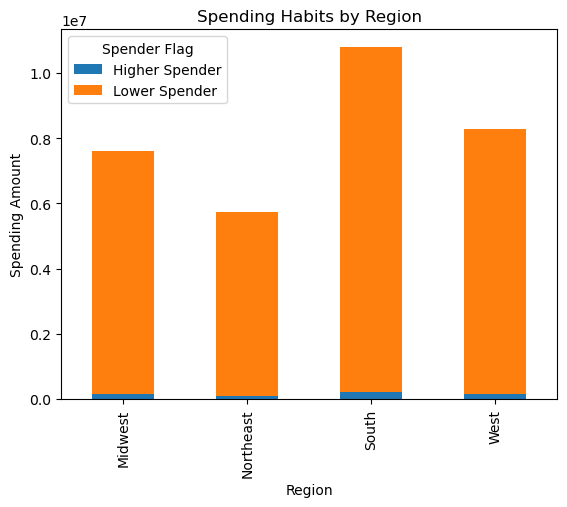

In [275]:
# Plotting the cross-tab as a bar chart
bar1 = regional_spending_habit.plot.bar(stacked=True)
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Spending Amount')
plt.legend(title='Spender Flag')
plt.show()

There is not much difference between regions in terms of the number of people who spent more, however, as we can see on the chart, the number of lower_spender people is higher in the south, followed by the west, midwest and finaly northeast. 

In [279]:
#exporting the chart
bar1.figure.savefig(os.path.join(path1, 'Bar - Spending Habits by regions.png'))

## Creating an Exclusion Flag

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [29]:
## applying the condition using .loc() function
df_merged_all.loc[df_merged_all['max_order'] >= 5, 'activity_level'] = 'high_active_customer'
df_merged_all.loc[df_merged_all['max_order'] < 5, 'activity_level'] = 'low_active_customer'

In [31]:
# checking count of the newly created categories
df_merged_all['activity_level'].value_counts(dropna = False)

activity_level
high_active_customer    30967702
low_active_customer      1440577
Name: count, dtype: int64

In [33]:
# creating a subset of dataframe including only customers placing more than 5 orders.
df_subset_active = df_merged_all[df_merged_all['activity_level'] == 'high_active_customer']

In [72]:
df_subset_active.shape

(30967702, 36)

In [74]:
df_subset_active.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,merge_indicator,merge1_indicator,product_name,aisle_id,department_id,prices,merge2,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region,activity_level
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,2,9,NaN,6184,1,0,both,both,both,Clementines,32,4,4.3,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,6184,2,1,both,both,both,Clementines,32,4,4.3,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,47402,3,0,both,both,both,Fuji Apples,24,4,7.1,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer


In [25]:
# exporting the subset dataframe
df_subset_active.to_pickle(os.path.join(path, 'Ex 4.10 subset_cust_active_cust_ords_prods.pickl'))

## Creating Customer Profile

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


### Customer Profile Based on Age Groups

In [35]:
#checking count of age 
df_merged_all['age'].value_counts()

age
49    531378
79    529796
48    529782
31    528569
64    528039
       ...  
60    484428
36    483956
66    476243
41    475273
25    472248
Name: count, Length: 64, dtype: int64

In [37]:
#running below syntax for printing all the ages
pd.options.display.max_rows=None

In [39]:
#checking count of age
df_merged_all['age'].value_counts(dropna=False)

age
49    531378
79    529796
48    529782
31    528569
64    528039
68    524364
27    524336
56    522512
43    522275
73    521081
29    520300
54    520280
75    520068
19    519636
35    518800
47    516904
44    515840
80    515312
38    515304
51    514947
23    514679
22    513967
69    513456
26    512927
21    512575
55    511507
45    511289
37    510593
81    509290
24    509098
30    508996
39    508202
34    507349
42    506788
40    505890
20    502902
72    502817
58    502643
59    502534
52    502299
77    502156
70    501857
53    501615
18    500558
74    498621
76    498372
32    497987
57    497348
62    496053
63    495955
78    495347
33    494571
67    494293
46    494184
50    488970
61    488008
28    487929
65    487025
71    485958
60    484428
36    483956
66    476243
41    475273
25    472248
Name: count, dtype: int64

In [41]:
#checking the maximum age in the dataframe
df_merged_all['age'].max()

81

In [43]:
# checking the minimum age in the dataframe
df_merged_all['age'].min()

18

In [45]:
#creating a new column under the name of age_groups and age categories based on the definition of age groups available on internet.
df_merged_all.loc[df_merged_all['age'] <= 18, 'age_groups'] = 'adolescent'
df_merged_all.loc[(df_merged_all['age'] >= 19) & (df_merged_all['age'] <= 35), 'age_groups'] = 'young_adult'
df_merged_all.loc[(df_merged_all['age'] >= 36) & (df_merged_all['age'] <= 64), 'age_groups'] = 'adult'
df_merged_all.loc[df_merged_all['age'] >= 65, 'age_groups'] = 'elderly'

In [46]:
df_merged_all.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,...,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region,age_groups
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult


In [47]:
#checking count of people in each age category
df_merged_all['age_groups'].value_counts(dropna=False)

age_groups
adult          14684796
young_adult     8646869
elderly         8576056
adolescent       500558
Name: count, dtype: int64

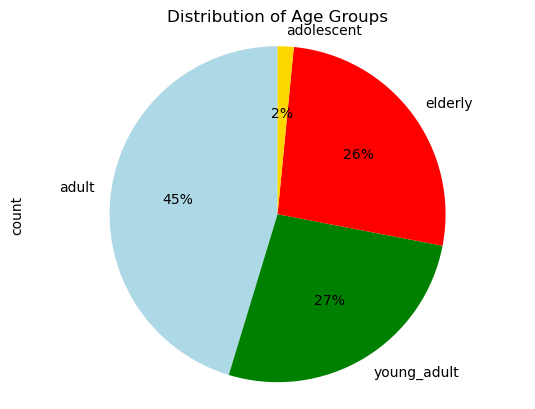

In [281]:
#visualizing the age groups on a pie chart
pie1 = df_merged_all['age_groups'].value_counts(dropna=False).plot.pie(autopct='%1.0f%%', startangle=90, 
colors=['lightblue', 'green', 'red', 'gold', 'violet'])
plt.title('Distribution of Age Groups')
plt.axis('equal')
plt.show()

The pie chart shows the age distribution of Instacart customers, revealing that 45% of the customer base is comprised of adults, making them the largest demographic. Young adults follow closely, accounting for 27% of the customer population, while elderly individuals represent 26%. The smallest segment, adolescents, make up only 2% of Instacart's customer base. This suggests that the platform primarily caters to adult and young adult shoppers, with minimal engagement from younger adolescents.

In [283]:
#exporting the pie chart
pie1.figure.savefig(os.path.join(path1, 'Pie - Distribution of Age Groups.png'))

### Customer Profile Based on Income

In [52]:
df_merged_all.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,...,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region,age_groups
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,adult


In [96]:
#checking max of income in the dataframe
df_merged_all['income'].max()

593901

In [98]:
#checking min of income in the dataframe
df_merged_all['income'].min()

25903

In [51]:
#creating a new column under the name of income_groups and income categories based on the definition of income groups in the USA.
df_merged_all.loc[df_merged_all['income'] <= 35000, 'income_groups'] = 'low_income'
df_merged_all.loc[(df_merged_all['income'] > 35000) & (df_merged_all['income'] <= 50000), 'income_groups'] = 'lower_middle_income'
df_merged_all.loc[(df_merged_all['income'] > 50000) & (df_merged_all['income'] <= 100000), 'income_groups'] = 'middle_income'
df_merged_all.loc[(df_merged_all['income'] > 100000) & (df_merged_all['income'] <= 150000), 'income_groups'] = 'upper_middle_income'
df_merged_all.loc[df_merged_all['income'] >150000, 'income_groups'] = 'higher_income'

In [102]:
#checking if the income_group column is created or not
df_merged_all.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,merge_indicator,merge1_indicator,product_name,aisle_id,department_id,prices,merge2,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region,activity_level,age_groups,income_groups
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,2,9,NaN,6184,1,0,both,both,both,Clementines,32,4,4.3,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,6184,2,1,both,both,both,Clementines,32,4,4.3,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,47402,3,0,both,both,both,Fuji Apples,24,4,7.1,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income


In [53]:
# checking count of customers falling in each income group
df_merged_all['income_groups'].value_counts(dropna=False)

income_groups
middle_income          13998044
upper_middle_income    10764598
higher_income           4051224
lower_middle_income     2633383
low_income               961030
Name: count, dtype: int64

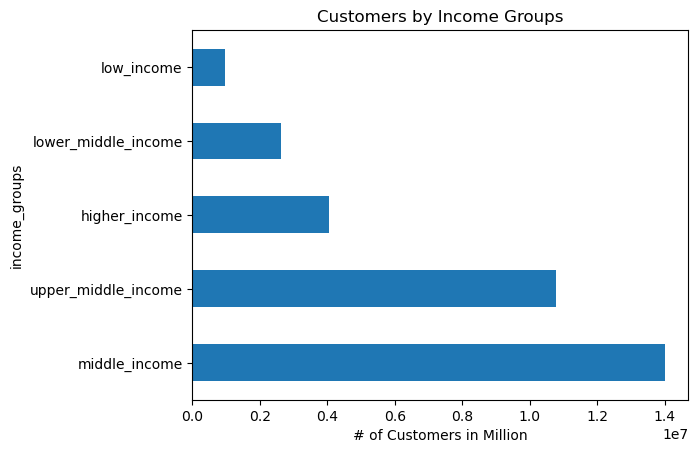

In [285]:
#plotting the income groups on a bar chart for better visualization.
bar2 = df_merged_all['income_groups'].value_counts(dropna=False).plot.barh()
plt.title('Customers by Income Groups')
plt.xlabel('# of Customers in Million')
plt.show()

The bar chart shows that the majority of customers fall within the middle_income category, earning between 50,000 to 100,000 annually. Following that,is the upper_middle_income group, which includes people earning between 100,000 and 150,000 per year. The third groups comprises high_income_earners, who make over 150,000 annually. In contrast, the smallest segment consist of low_income individuals, whose earnings are below 35,000 a year.  

In [287]:
#exporting the bar chart 
bar2.figure.savefig(os.path.join(path1, 'Bar - Customers by Income Groups.png'))

### Creating Customer Profile based on Certain Goods in Department ID Column

In [108]:
df_merged_all.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,merge_indicator,merge1_indicator,product_name,aisle_id,department_id,prices,merge2,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region,activity_level,age_groups,income_groups
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,2,9,NaN,6184,1,0,both,both,both,Clementines,32,4,4.3,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,6184,2,1,both,both,both,Clementines,32,4,4.3,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,47402,3,0,both,both,both,Fuji Apples,24,4,7.1,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income


In [110]:
df_merged_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'merge_indicator',
       'merge1_indicator', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge2', 'busiest_day', 'busiest_days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'average_price', 'spender_flag',
       'median_prior_order', 'loyalty_flag3', 'merge_cust', 'region',
       'activity_level', 'age_groups', 'income_groups'],
      dtype='object')

In [57]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
#renaming 'Unnamed: 0' to 'department_id'
df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [61]:
#creating data dictionary out of 'department_id and 'department
data_dict = df_dep.set_index('department_id')['department'].to_dict()
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [63]:
#mapping values in the 'department_id' column and assigning values from data_dict to department
df_merged_all.loc[:, 'department'] = df_merged_all['department_id'].map(data_dict)

In [65]:
pd.options.display.max_columns=None

In [67]:
df_merged_all.head()

,user_id,gender,state,age,date_joined,no_dependants,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,merge_indicator,merge1_indicator,product_name,aisle_id,department_id,prices,merge2,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,average_price,spender_flag,median_prior_order,loyalty_flag3,merge_cust,region,activity_level,age_groups,income_groups,department
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,2,9,NaN,6184,1,0,both,both,both,Clementines,32,4,4.3,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income,produce
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,regularly_busy_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income,dairy eggs
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,both,both,0% Greek Strained Yogurt,120,16,12.6,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income,dairy eggs
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,6184,2,1,both,both,both,Clementines,32,4,4.3,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income,produce
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30.0,47402,3,0,both,both,both,Fuji Apples,24,4,7.1,both,Regularly busy,slowest_days,Most orders,8,New customer,7.988889,Lower Spender,19.0,Regular customer,both,Midwest,high_active_customer,adult,higher_income,produce


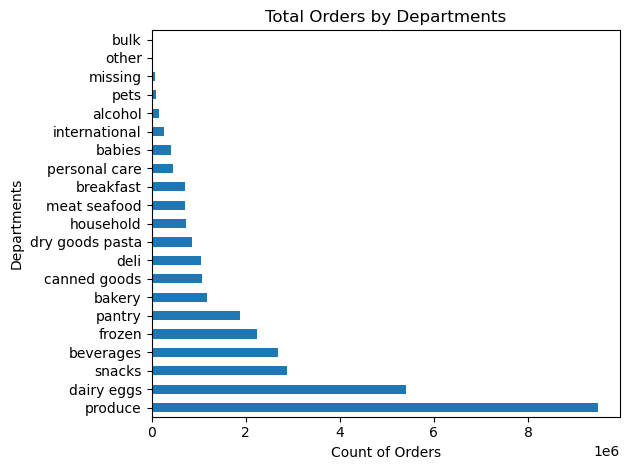

In [289]:
#visualization department orders on a chart
bar3 = df_merged_all['department'].value_counts().plot.barh()
plt.title('Total Orders by Departments')
plt.tight_layout()
plt.xlabel('Count of Orders')
plt.ylabel('Departments')
plt.tight_layout()

Instacart's highest-performing departments include Produce, Dairy & Eggs, Snacks, Beverages, and Frozen, with Produce and Dairy & Eggs generating the largest order volumes. By concentrating efforts on these two departments, sales could see a notable increase. Furthermore, understanding the customer demographics of each department could enable more effective, targeted advertising strategies to drive further growth.

In [291]:
#exporting the bar chart
bar3.figure.savefig(os.path.join(path1, 'Bar - Total Orders by Departments.png'))

## Customer Profile by Number of Dependents

In [71]:
df_merged_all['no_dependants'].value_counts(dropna=False)

no_dependants
3    8136267
0    8098121
2    8091893
1    8081998
Name: count, dtype: int64

In [73]:
#creating a new column under the name of income_groups and income categories based on the definition of income groups in the USA.
# Assign family size based on the number of dependents
df_merged_all.loc[df_merged_all['no_dependants'] == 0, 'family_size'] = 'Single individuals or couples with no children'
df_merged_all.loc[df_merged_all['no_dependants'] == 1, 'family_size'] = 'Small families with one child or single parent with one child'
df_merged_all.loc[df_merged_all['no_dependants'] == 2, 'family_size'] = 'Medium-sized families with two children or a single parent with two children'
df_merged_all.loc[df_merged_all['no_dependants'] >= 3, 'family_size'] = 'Larger families with three children or more'
df_merged_all['family_size'].fillna('Unknown', inplace=True)

C:\Users\BaratSakhizada\AppData\Local\Temp\ipykernel_17888\3771676828.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_all['family_size'].fillna('Unknown', inplace=True)


In [75]:
#checking if the desired column is created or not
df_merged_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'merge_indicator',
       'merge1_indicator', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge2', 'busiest_day', 'busiest_days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'average_price', 'spender_flag',
       'median_prior_order', 'loyalty_flag3', 'merge_cust', 'region',
       'activity_level', 'age_groups', 'income_groups', 'department',
       'family_size'],
      dtype='object')

In [77]:
df_merged_all['family_size'].value_counts(dropna=False)

family_size
Larger families with three children or more                                     8136267
Single individuals or couples with no children                                  8098121
Medium-sized families with two children or a single parent with two children    8091893
Small families with one child or single parent with one child                   8081998
Name: count, dtype: int64

Text(0, 0.5, 'Family Size')

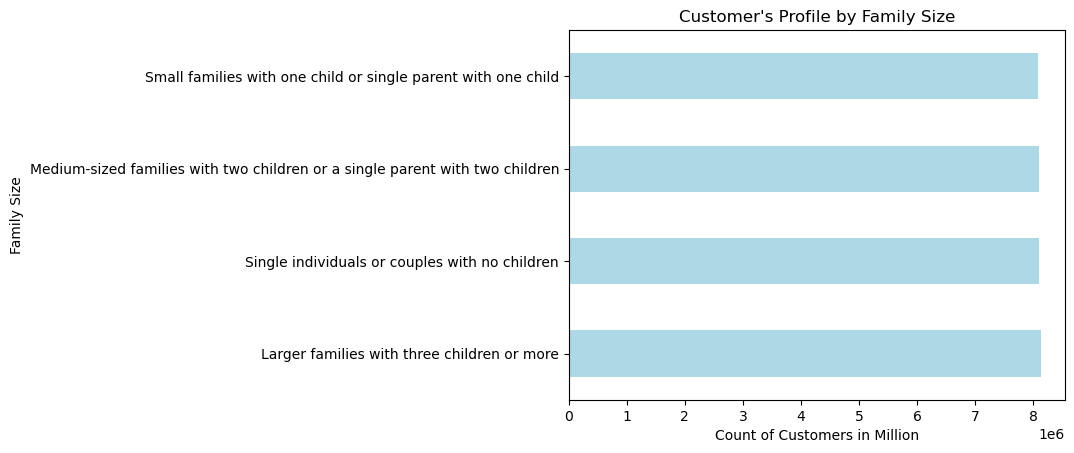

In [293]:
#plotting custmer's number by their family size on a bar chart
bar4 = df_merged_all['family_size'].value_counts(dropna=False).plot.barh(color='lightblue')
plt.title("Customer's Profile by Family Size")
plt.xlabel('Count of Customers in Million')
plt.ylabel('Family Size')

The bar chart presents the distribution of Instacart supermarket customers based on family size. It shows that the largest customer group is small families with one child or a single parent with one child, followed closely by medium-sized families with two children or a single parent with two children. Single individuals or couples with no children and larger families with three children or more make up slightly smaller but still significant portions of the customer base. This suggests that Instacart serves a broad range of family structures.

In [295]:
#exporting the bar chart
bar4.figure.savefig(os.path.join(path1, 'Bar - Spending Habits by regions.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


### Family size vis-a-vis number of order


In [81]:
# Family size vis-a-vis number of order
aggregation_family_size = df_merged_all.groupby('family_size').agg({'max_order' : ['min', 'mean', 'max']})
aggregation_family_size

max_order               
                                                         min       mean max
family_size                                                                
Larger families with three children or more                1  33.034824  99
Medium-sized families with two children or a si...         2  32.901101  99
Single individuals or couples with no children             2  33.298062  99
Small families with one child or single parent ...         3  32.969039  99

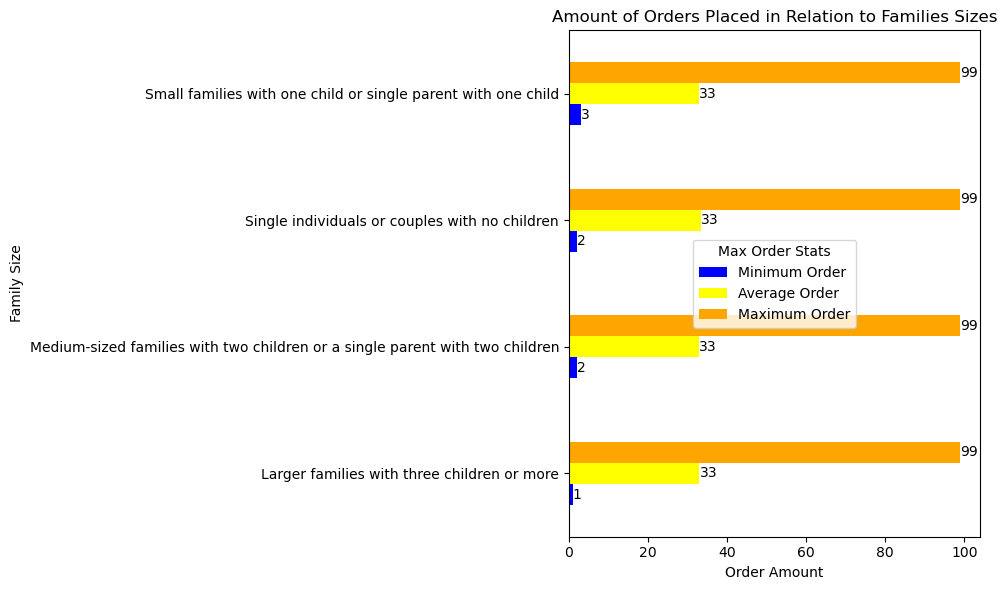

In [305]:
# plotting amount of orders placed in relation to family size. 
aggregation_family_size = df_merged_all.groupby('family_size').agg({'max_order': ['min', 'mean', 'max']})
bar5, ax = plt.subplots(figsize=(10, 6))
aggregation_family_size.plot.barh(ax=ax,color=['blue', 'yellow', 'orange'])
ax.set_title('Amount of Orders Placed in Relation to Families Sizes')
ax.set_xlabel('Order Amount')
ax.set_ylabel('Family Size')
ax.legend(['Minimum Order', 'Average Order', 'Maximum Order'], title='Max Order Stats')
for container in ax.containers: ax.bar_label(container, fmt='%.0f')
plt.tight_layout()
plt.show()

The above table shows family size did not affect the amount of goods being purchased by the customers. Irrespective of the family size, surprisingly, customers purchased almost the same amount of commodities. 

In [313]:
bar5.figure.savefig(os.path.join(path1, 'Bar - Number of Orders Placed in Relation to Family Size.png'))

### Family Size vis-a-vis income

In [196]:
# Aggregating the income data by family size
aggregation_family_size = df_merged_all.groupby('family_size').agg({'income': ['min', 'mean', 'median', 'max']})
aggregation_family_size

income                \
                                                      min          mean   
family_size                                                               
Larger families with three children or more         25941  99438.363726   
Medium-sized families with two children or a si...  25911  99388.063162   
Single individuals or couples with no children      25903  99657.650084   
Small families with one child or single parent ...  25937  99268.342700   

                                                                     
                                                     median     max  
family_size                                                          
Larger families with three children or more         96625.0  591089  
Medium-sized families with two children or a si...  96574.0  593901  
Single individuals or couples with no children      96844.0  584097  
Small families with one child or single parent ...  96480.0  579397

Income data accross various family sizes also shows similar results. There is not much difference in terms of income among families of different size.

In [85]:
# Age_groups  vis-a-vi income
aggregation_age_groups = df_merged_all.groupby('age_groups').agg({'income' : ['min', 'mean','median', 'max']})
aggregation_age_groups

income                                 
               min           mean    median     max
age_groups                                         
adolescent   26067   70471.479291   68785.0  357226
adult        25903  108037.781325  107848.0  592409
elderly      29001  115590.115906  116059.0  593901
young_adult  25911   70490.920724   69057.0  396364

The income data segmented by age groups—adolescents, adults, elderly, and young adults—reveals a clear trend of increasing average and median incomes with age. Adolescents have a mean income of approximately 70,471, while adults and elderly individuals lead with means of around 108,038 and 115,590, respectively, indicating financial growth as individuals mature. The young adult group has a lower mean income of about 70,491. Notably, the maximum incomes in the adult and elderly categories are significantly higher, suggesting the presence of outliers that inflate the average income figures. 

### Spender_flag vis-a-vis days_since_prior_order

In [151]:
aggregation_spender_category = df_merged_all.groupby('spender_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max']})
aggregation_spender_category

days_since_prior_order                 
                                  min       mean   max
spender_flag                                          
Higher Spender                    0.0  10.797108  30.0
Lower Spender                     0.0  11.110593  30.0

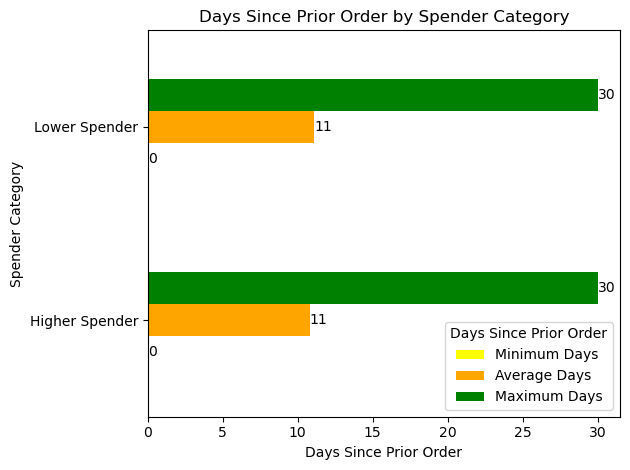

In [309]:
# Visualizing days_since_prior_order by spender category
aggregation_spender_category = df_merged_all.groupby('spender_flag').agg({'days_since_prior_order': ['min', 'mean', 'max']})
bar6, ax = plt.subplots()
aggregation_spender_category.plot.barh(ax=ax, color=['yellow', 'orange', 'green'])
ax.set_title('Days Since Prior Order by Spender Category')
ax.set_xlabel('Days Since Prior Order')
ax.set_ylabel('Spender Category')
ax.legend(['Minimum Days', 'Average Days', 'Maximum Days'], title='Days Since Prior Order')
for container in ax.containers: ax.bar_label(container, fmt='%.0f')
plt.tight_layout()
plt.show()

There isn't much difference in terms of frequency of placing an order between high spender and low spender customer groups. Both groups on average placed an order every 10 to 11 days.

In [315]:
#exporting the bar chart
bar6.figure.savefig(os.path.join(path1, 'Bar - Days Since Prior Order by Spender Category.png'))

### Age groups and order_hour_of_day

In [220]:
aggregation_age_groups = df_merged_all.groupby('age_groups').agg({'order_hour_of_day' : ['min', 'mean','median', 'max']})
aggregation_age_groups

order_hour_of_day                      
                          min       mean median max
age_groups                                         
adolescent                  0  13.352962   13.0  23
adult                       0  13.436822   13.0  23
elderly                     0  13.426606   13.0  23
young_adult                 0  13.408042   13.0  23

Interestingly, the purchasing pattern in terms of time for all age groups are similar. 

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


### aggregating age groups with order_days_of_week

In [167]:
#aggregating age groups with order_days_of_week to see which age group mader their purchases on which days of the week.
aggregation_age_groups = df_merged_all.groupby('age_groups').agg({'order_dow' : ['median']})
aggregation_age_groups

,order_dow
,median
age_groups,
adolescent,2.0
adult,3.0
elderly,3.0
young_adult,3.0


In [24]:
df_merged_all['order_dow'].value_counts(dropna=False)

order_dow
0    6205034
1    5660800
6    4497012
2    4214250
5    4206211
3    3840882
4    3784090
Name: count, dtype: int64

### aggregating department with orders to see which departments received the highst number of order. 

In [93]:
#aggregating department with orders to see which departments received the highst number of order. 
aggregation_department = df_merged_all.groupby('department').agg({'max_order' : ['min', 'mean','median', 'max']})
aggregation_department

max_order                      
                      min       mean median max
department                                     
alcohol                 3  29.982973   22.0  99
babies                  3  37.880479   33.0  99
bakery                  3  33.428712   27.0  99
beverages               3  33.177410   26.0  99
breakfast               3  32.811254   26.0  99
bulk                    3  37.891042   33.0  99
canned goods            3  30.326645   23.0  99
dairy eggs              1  34.317831   28.0  99
deli                    3  32.396767   26.0  99
dry goods pasta         3  30.668128   24.0  99
frozen                  1  30.335320   23.0  99
household               1  29.926926   23.0  99
international           3  31.589126   24.0  99
meat seafood            3  31.122492   25.0  99
missing                 3  29.417268   22.0  99
other                   3  31.908131   24.0  99
pantry                  2  32.026033   25.0  99
personal care           3  30.489331   23.0  99
pets                    3  29.598837   22.0  99
produce                 1  34.022665   27.0  99
snacks                  3  33.427735   27.0  99

The table presents sales data by department in Instacart, with key statistics like min, mean, median, and max for each category. The mean column reflects the average sales figures across departments:

Alcohol has an average sale of about 29.98.
Babies products average around 37.88, one of the higher categories.
Bakery averages 33.43, while beverages are close at 33.18.
Breakfast items have an average of 32.81.
Canned goods and frozen items both average around 30.33.
Dairy & eggs have a relatively high average of 34.32, while deli is slightly lower at 32.40.
Produce and snacks average around 34 and 33.44, respectively.
Overall, departments such as babies, dairy eggs, produce, snakes, and bakery show higher average sales.

### aggregating regions with days_since_prior_order to see how frequent customers placed an order in each region. 


In [91]:
aggregation_region = df_merged_all.groupby('region').agg({'days_since_prior_order' : ['min', 'mean','median', 'max']})
aggregation_region

days_since_prior_order                        
                             min       mean median   max
region                                                  
Midwest                      0.0  11.182252    8.0  30.0
Northeast                    0.0  11.075936    8.0  30.0
South                        0.0  11.108539    8.0  30.0
West                         0.0  11.047567    8.0  30.0

In [41]:
aggregation_region = df_merged_all.groupby('region').agg({'max_order' : ['min', 'mean','median', 'max']})
aggregation_region

max_order                      
                min       mean median max
region                                   
Midwest           2  32.585049   26.0  99
Northeast         2  33.202425   26.0  99
South             1  33.101851   26.0  99
West              3  33.306456   27.0  99

### aggregating regions with the average of commodities prices 

In [105]:
aggregation_region = df_merged_all.groupby('region').agg({'prices' : ['mean']})
aggregation_region

,prices
,mean
region,
Midwest,12.714759
Northeast,11.554529
South,12.195014
West,11.319399


The average item prices for Instacart supermarket across the USA vary slightly by region. The Midwest has the highest average price at 12.71, followed by the South at 12.20. The Northeast has an average price of 11.55, while the West has the lowest average price at 11.32. This indicates that items tend to be more expensive in the Midwest and South compared to the Northeast and West, with a modest price difference across regions.

### aggregating regions with individuals income

In [107]:
aggregation_region = df_merged_all.groupby('region').agg({'income' : ['min', 'mean','median', 'max']})
aggregation_region

income                                
             min           mean   median     max
region                                          
Midwest    25903  100102.343901  97254.0  579397
Northeast  26072   99564.065401  96789.0  584097
South      25911   99011.486359  96108.0  591089
West       25937   99298.190423  96651.0  593901

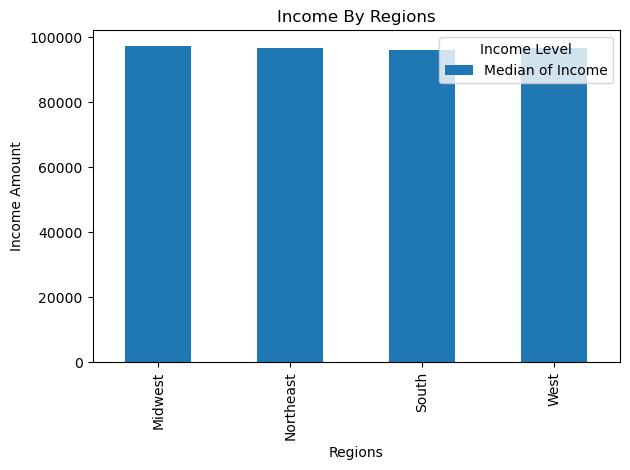

In [273]:
aggregation_region = df_merged_all.groupby('region').agg({'income' : ['median']}).plot.bar()
plt.title('Income By Regions')
plt.tight_layout()
plt.xlabel('Regions')
plt.ylabel('Income Amount')
plt.tight_layout()
plt.legend(['Median of Income'], title='Income Level')


The table presents income statistics for different regions in the USA for Instacart customers. Overall, the income distribution is relatively consistent across regions, with slight variations in averages and medians. All regions show a wide range between the minimum and maximum incomes. The Midwest has the highest average, while the South has the lowest.

In [317]:
#exporting the bar chart
aggregation_region.figure.savefig(os.path.join(path1, 'Bar - Income By Regions.png'))

### crosstabulating department with spender_flag to see order pattern of higher and lower spenders

In [115]:
crosstab_income_department=pd.crosstab(df_merged_all['department'],df_merged_all['spender_flag'],dropna=False)
crosstab_income_department

spender_flag,Higher Spender,Lower Spender
department,,
alcohol,13247,140449
babies,4693,419133
bakery,29554,1142874
beverages,61259,2626888
breakfast,15700,687333
bulk,123,34450
canned goods,21420,1046638
dairy eggs,114290,5286143
deli,17650,1033599


The table highlights the purchasing patterns of higher spenders and lower spenders at Instacart:
Higher spenders bought the most items in the produce department, with 132,566 purchases, followed by dairy & eggs with 114,290 purchases, and beverages at 61,259. These categories are the most popular among high spenders.
Lower spenders, on the other hand, also favored produce, with a significantly higher volume of 9,346,725 purchases, followed by dairy & eggs with 5,286,143 purchases, and beverages at 2,626,888. This group shows a strong preference for the same categories but in much larger volumes.

C:\Users\BaratSakhizada\AppData\Local\Temp\ipykernel_17888\1184437537.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Spender Flag')


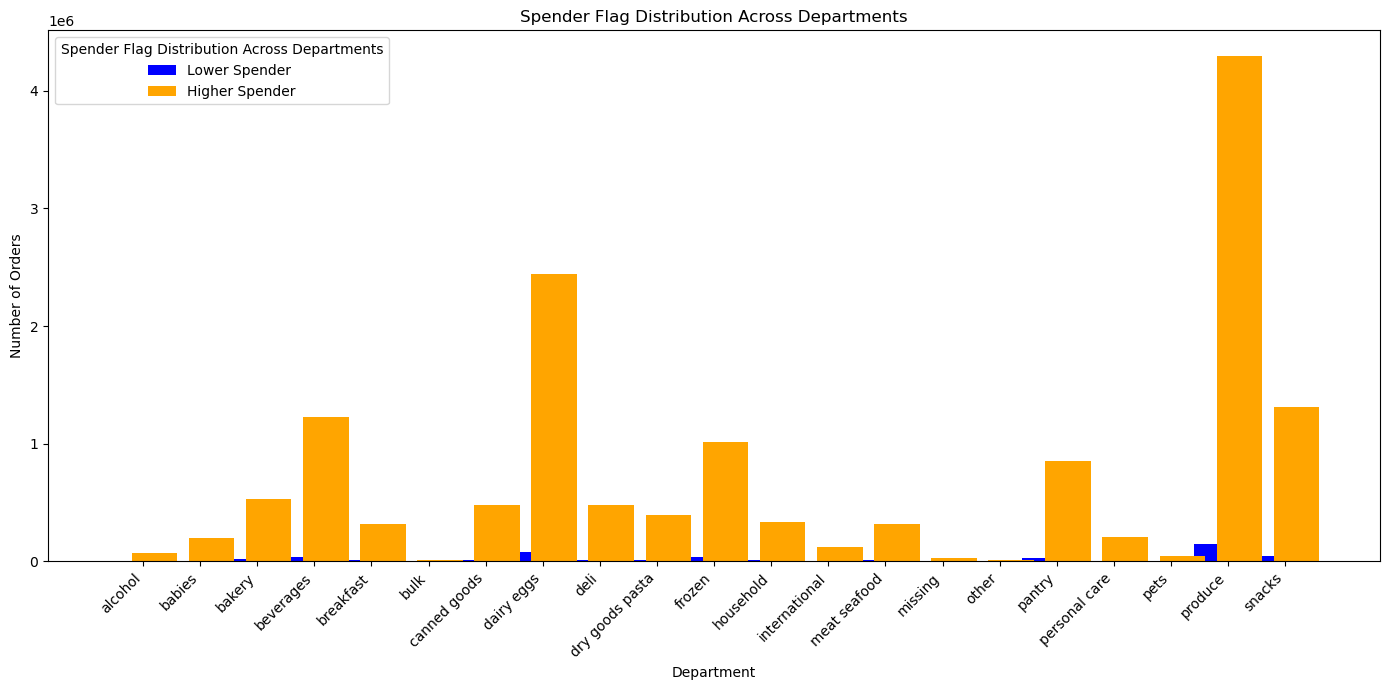

In [321]:
# Creating a grouped bar chart
bar7, ax = plt.subplots(figsize=(14, 7))
bar_width = 0.4
departments = crosstab_income_department.index
spender_flags = crosstab_income_department.columns
index = np.arange(len(departments))
ax.bar(index, crosstab_income_department[spender_flags[0]], color='blue')
ax.bar(index + bar_width, crosstab_income_department[spender_flags[1]],color='orange')
ax.set_title('Spender Flag Distribution Across Departments')
ax.set_xlabel('Department')
ax.set_ylabel('Number of Orders')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(departments, rotation=45, ha='right')
ax.legend(title='Spender Flag')
ax.legend(['Lower Spender','Higher Spender'], title='Spender Flag Distribution Across Departments')
plt.tight_layout()
plt.show()

In [323]:
#exporting the bar chart
bar7.figure.savefig(os.path.join(path1, 'Bar - Spender Categories accross Departments.png'))

### crosstabulating department with income_groups to see purchase pattern of different income groups

In [119]:
crosstab_incomegroup_department=pd.crosstab(df_merged_all['department'],df_merged_all['income_groups'],dropna=False)
crosstab_incomegroup_department

income_groups,higher_income,low_income,lower_middle_income,middle_income,upper_middle_income
department,,,,,
alcohol,24953,5345,14463,61159,47776
babies,54433,7029,23835,190628,147901
bakery,154040,29100,85609,508207,395472
beverages,325093,111675,293836,1109213,848330
breakfast,86853,27291,70077,295035,223777
bulk,3773,1297,3592,14993,10918
canned goods,138733,21844,64808,471849,370824
dairy eggs,684433,138584,396654,2362401,1818361
deli,130995,30556,83540,455050,351108


### crosstabulating department with age_groups to see order pattern of various age groups

In [121]:
crosstab_income_department=pd.crosstab(df_merged_all['department'],df_merged_all['age_groups'],dropna=False)
crosstab_income_department

age_groups,adolescent,adult,elderly,young_adult
department,,,,
alcohol,3234,69733,39036,41693
babies,7047,196967,109445,110367
bakery,18391,531024,309522,313491
beverages,39883,1223067,714832,710365
breakfast,11136,318578,183844,189475
bulk,550,15404,9242,9377
canned goods,16371,482442,282438,286807
dairy eggs,83608,2439227,1426699,1450899
deli,16255,476444,277618,280932


In [325]:
df_merged_all.to_pickle(os.path.join(path, 'Ex 4.10 - DF_Final_Final_clean.pickle'))